In [120]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [121]:
# Load the dataset
file_path = r"C:\Users\LENOVO\OneDrive\Desktop\50_Startups.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(data.head())

# Display the last few rows to get an overview of the entire dataset
print(data.tail())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94
    R&D Spend  Administration  Marketing Spend    Profit
45    1000.23       124153.04          1903.93  64926.08
46    1315.46       115816.21        297114.46  49490.75
47       0.00       135426.92             0.00  42559.73
48     542.05        51743.15             0.00  35673.41
49       0.00       116983.80         45173.06  14681.40


In [122]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64
There are 0 duplicate values in the dataset


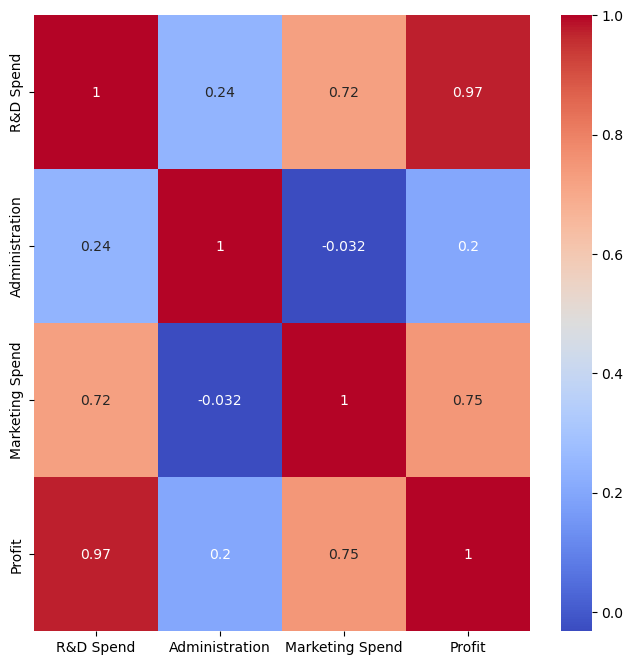

In [123]:
# Data Preprocessing

# Check for null values
print(data.isnull().sum())

print('There are',data.duplicated().sum(),'duplicate values in the dataset')

# Correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


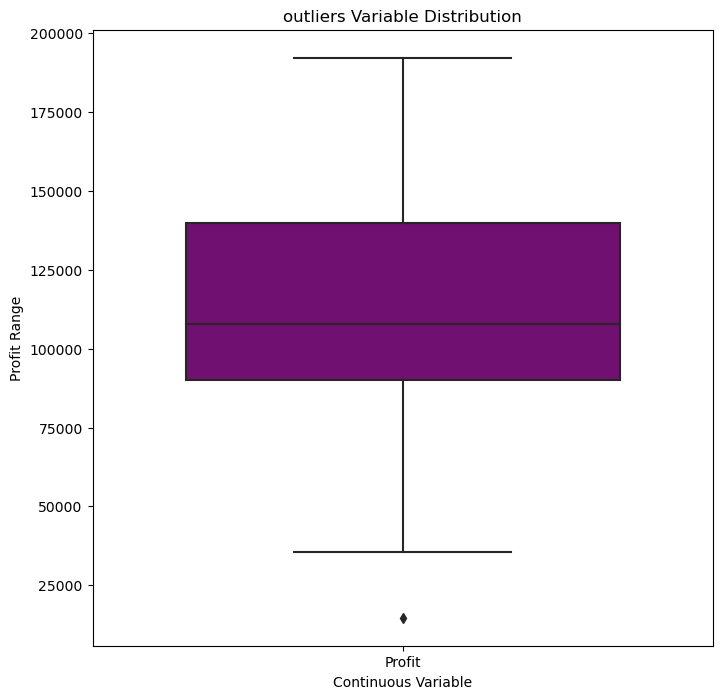

In [125]:
outliers = ['Profit']
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=data[outliers], orient="v", palette=["purple", "green", "blue"], width=0.7)

plt.title("outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16568\3415032953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'], bins=6, kde=True)


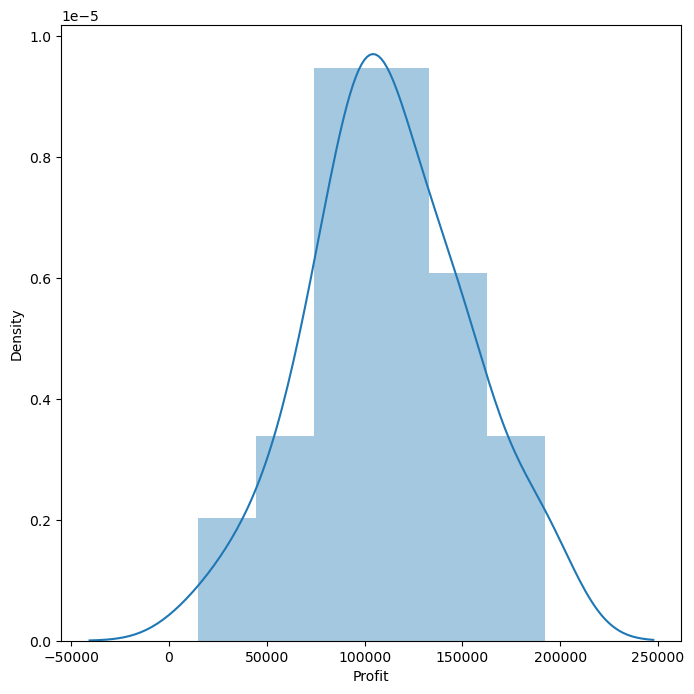

In [126]:
sns.distplot(data['Profit'], bins=6, kde=True)
plt.show()

In [127]:
# Split the data into input features (R&D Spend, Administration, Marketing Spend) and the target (Profit):
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

In [128]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Train Model

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [130]:
# Compare Models

results_df = pd.DataFrame(results).T
print(results_df)

                            MAE           MSE          RMSE        R2
Linear Regression   6979.152252  8.092632e+07   8995.905803  0.900065
Decision Tree      10926.720000  3.198768e+08  17885.098933  0.604989
Random Forest       6332.114490  7.372461e+07   8586.303812  0.908959


In [131]:
# Choose Best Model

best_model_name = results_df['R2'].idxmax()
best_model = models["Linear Regression"]
print(f"The best model is: {'Linear Regression'}")

The best model is: Linear Regression


In [132]:
# Save best model

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

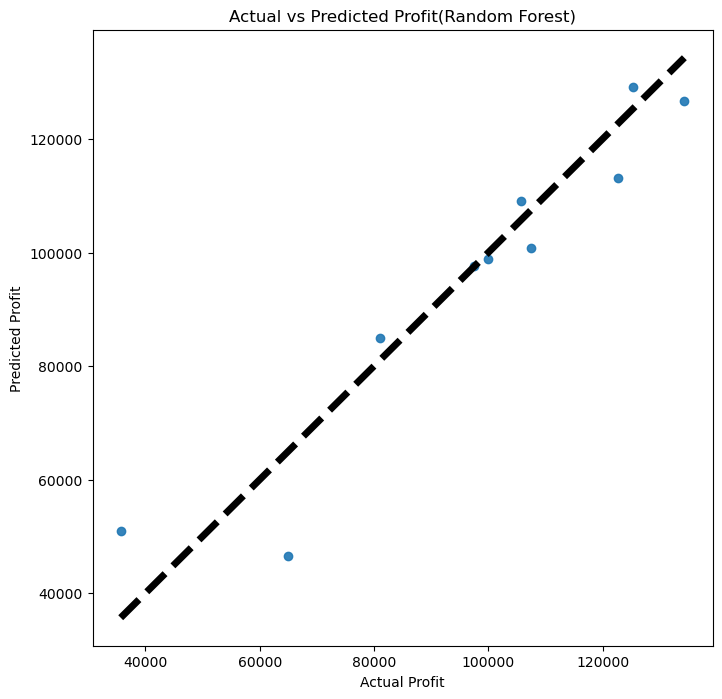

In [133]:
#Visualize Results

y_pred_best = best_model.predict(X_test)
plt.scatter(y_test, y_pred_best, alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=5)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title(f'Actual vs Predicted Profit({best_model_name})')
plt.show()

In [134]:
# Assuming you have y_pred and y_test as NumPy arrays

df = pd.DataFrame({'Predicted Value': y_pred, 'Actual Value': y_test})
print(df)

    Predicted Value  Actual Value
13      133969.2403     134307.35
39       89813.1420      81005.76
30       99838.6757      99937.59
45       43366.5160      64926.08
17      131248.2423     125370.37
48       39543.1382      35673.41
26      114392.1076     105733.54
25      102300.4033     107404.34
32       94271.2374      97427.84
19      128627.3275     122776.86


In [135]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score is:", r2Score*100)

R2 score is: 92.70782505508323


In [136]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squared Error is:", mse*100)


Mean Squared Error is: 7372461315.53237


In [137]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error is: ", rmse*100)

Root Mean Squared Error is:  858630.3812195541


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error is:", mae)